In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import LabelEncoder

In [49]:
df=pd.read_csv("customer_purchase_intention.csv")
df.drop(columns="CustomerID",inplace=True)
df

,Age,Gender,DeviceType,TimeOnSite,PageViews,AdClicks,SessionDuration,Country,ReturningVisitor,Purchase
0,56,Female,Desktop,11.72,3,0,30.87,Germany,0,0
1,69,Female,Mobile,4.64,5,1,21.67,Germany,0,0
2,46,Female,Desktop,5.02,13,5,54.86,UK,1,1
3,32,Female,Mobile,10.21,15,9,21.05,India,0,0
4,60,Male,Desktop,15.33,14,4,27.88,UK,1,1
...,...,...,...,...,...,...,...,...,...,...
795,68,Female,Mobile,1.06,18,1,41.95,Germany,0,1
796,22,Male,Mobile,13.16,10,5,11.78,UK,1,1
797,64,Male,Desktop,6.67,9,6,19.82,India,0,1
798,42,Male,Mobile,5.57,8,4,25.52,Canada,0,0


In [50]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Age,Gender,DeviceType,TimeOnSite,PageViews,AdClicks,SessionDuration,Country,ReturningVisitor,Purchase
0,56,0,0,11.72,3,0,30.87,1,0,0
1,69,0,1,4.64,5,1,21.67,1,0,0
2,46,0,0,5.02,13,5,54.86,3,1,1
3,32,0,1,10.21,15,9,21.05,2,0,0
4,60,1,0,15.33,14,4,27.88,3,1,1
...,...,...,...,...,...,...,...,...,...,...
795,68,0,1,1.06,18,1,41.95,1,0,1
796,22,1,1,13.16,10,5,11.78,3,1,1
797,64,1,0,6.67,9,6,19.82,2,0,1
798,42,1,1,5.57,8,4,25.52,0,0,0


In [51]:
x=df.drop(columns="Purchase")
y=df["Purchase"]
y

0      0
1      0
2      1
3      0
4      1
      ..
795    1
796    1
797    1
798    0
799    0
Name: Purchase, Length: 800, dtype: int64

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [53]:
model=SVC(kernel="rbf")
model.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [54]:
pre=model.predict(x_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1])

In [55]:
accuracy=accuracy_score(y_test,pre)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:70.00%


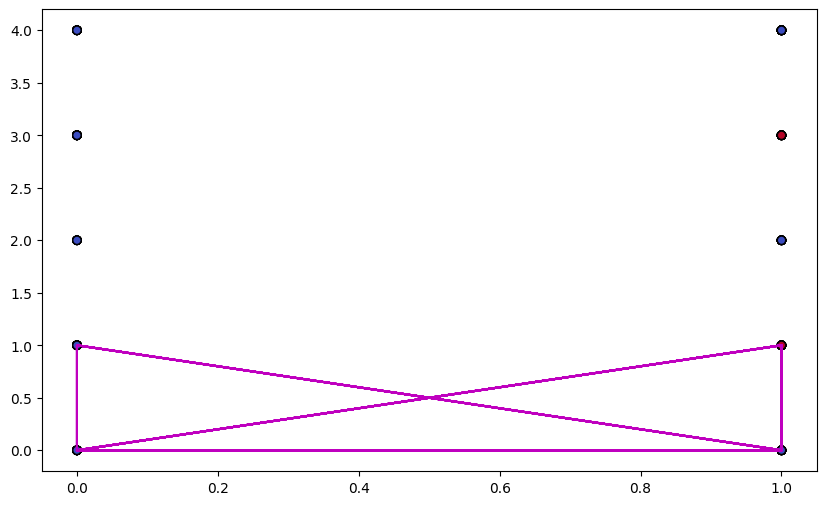

In [59]:
plt.figure(figsize=[10,6])
plt.scatter(x_test["Gender"],x_test["Country"],c=pre,cmap="coolwarm",edgecolors="k")
plt.plot(x_test["Gender"],pre,color="m")
plt.show()

In [61]:
new=pd.DataFrame({
    "Age":[58],
    "Gender":label.fit_transform(["Male"]),
    "DeviceType":label.fit_transform(["Mobile"]),
    "TimeOnSite":[4.57],
    "PageViews":[5],
    "AdClicks":[0],
    "SessionDuration":[30.87],
    "Country":label.fit_transform(["Germany"]),
    "ReturningVisitor":[0]

})
p=model.predict(new)
p

array([0])